<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Juan Pablo Jorquera 201573533-6</h3>
    <h3 align="center">David Medel 201573548-4</h3>
    <h3 align="center">Agosto de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b></font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 16 de septiembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Limpiando Datos (15p)

Como se mencionó en la ayudantía de laboratorio, la limpieza de datos es algo importante que se debe realizar antes de trabajar con un conjunto de datos, en esta sección trabajará con el dataset "limpieza.csv". Se espera que usted sea capaz de evidenciar las fallas dentro de este dataset y después de realizar la limpieza presente el dataset final resultante para comparar. 

>**Importante:** Si bien la limpieza es subjetiva, no optará a todo el puntaje de esta sección si presenta una limpieza incompleta (se observa que su dataset final se puede limpiar más a simple vista).

In [1]:
# Librerías a utilizar durante el trabajo
suppressPackageStartupMessages(library(tidyverse))
library(ggplot2)

In [108]:
limpieza <- read.csv("limpieza.csv")

# Limpieza de tabla
limpieza <- limpieza %>%
# Normalizar columna genero con variantes a 'masculino' y 'femenino'
    mutate(genero = str_replace(genero, 'hombre', 'masculino')) %>%
    mutate(genero = str_replace(genero, 'Hombre', 'masculino')) %>%
    mutate(genero = str_replace(genero, 'Masculino', 'masculino')) %>%
    mutate(genero = str_replace(genero, 'mujer', 'femenino')) %>%
    mutate(genero = str_replace(genero, 'Mujer', 'femenino')) %>%
    mutate(genero = str_replace(genero, 'Femenino', 'femenino')) %>%
# Normalizar columna mascota a 'perro' y 'gato'
    mutate(mascota = str_replace(mascota, 'Perro', 'perro')) %>%
    mutate(mascota = str_replace(mascota, 'Gato', 'gato')) %>%
# Filtro de personas anómalas con edad 0
    filter(edad > 0) %>%
# Cambiar tipo de columna estado civil
    mutate(e_civil = as.character(e_civil)) %>%
# Cambiar tipo de columna edad
    mutate(edad = as.integer(edad)) %>%
# Separar columna trabajo en tipo de trabajo y sueldo
    separate(trabajo, c("tipo_trabajo", "sueldo"), "/") %>%
# Limpiar y convertir nueva columna sueldo a numerico
    mutate(sueldo = as.integer(substring(sueldo, 2)))

limpieza

genero,mascota,edad,tipo_trabajo,sueldo,e_civil
<chr>,<chr>,<int>,<chr>,<int>,<chr>
masculino,gato,44,dependiente,500000,viud@
masculino,no,70,dependiente,100000,casad@
femenino,no,54,dependiente,500000,solter@
masculino,perro,47,independiente,200000,separad@
femenino,gato,33,dependiente,500000,casad@
masculino,perro,64,independiente,200000,casad@
masculino,perro,18,dependiente,500000,viud@
femenino,gato,67,independiente,500000,viud@
masculino,gato,45,independiente,200000,separad@


## 2. Apps en la Playstore (35p)

Google Play Store actualmente posee una enorme cantidad de aplicaciones que pueden ser descargadas por los usuarios. En esta sección utilizará una pequeña parte de dicho universo y trabajará principalmente en análisis exploratorio de los datos para responder las preguntas que verá a continuación. 

El archivo a utilizar es "googleplaystore.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/lava18/google-play-store-apps)

>PD: Hay 1 fila mala en el dataset, no es difícil de identificar.

Primero realizaremos limpieza a los datos para su correcto uso

In [335]:
datos <- read.csv("googleplaystore.csv")
#Eliminar fila con categoria = 1.9
datos<- datos[datos$Category != "1.9", ]
#Eliminar filas NaN
datos<- datos[datos$Type != 'NaN', ]
datos<- datos[datos$Rating!='NaN',]

#datos<- datos[datos$Rating != 'NaN', ]
#Rating a numeros
datos$Rating = as.numeric(datos$Rating)
#sacamos el varies with device


#INSTALL Y SIZE
datos <- datos %>%
    mutate(Installs = gsub(',*', '', gsub('\\+', '', Installs))) %>%
    # Con . y M a 00
    mutate(Size = gsub('(?<=\\..)M', '00', as.character(Size), perl=TRUE)) %>%
    # Eliminar puntos
    mutate(Size = gsub('\\.', '', Size)) %>%
    # Los M que faltan a 000
    mutate(Size = gsub('M', '000', Size)) %>%
    mutate(Size = gsub('K', '', Size))

datos$Size = str_replace(datos$Size, 'Varies with device', '0')
#tamaños


#installs que no considera NA
install= subset(datos,datos$Installs != "NA")
install$Installs =as.numeric(install$Installs)

head(tamanios)

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
<fct>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


>a) ¿Es posible observar alguna concentración de ratings de las aplicaciones en torno a un intervalo? Si su respuesta es sí, ¿Qué rango/s tiene/n mayor concentración?

In [268]:
intervalos <- seq(from = 1, to = 5, by = 1) 
frecuencias <- cut(datos$Rating, 
                 breaks = intervalos,   
                 dig.lab = 2,   
                 right = FALSE) 
tabla.frec  <- table(frecuencias)   # Crea la tabla de frecuencias
cbind(tabla.frec)



,tabla.frec
"[1,2)",56
"[2,3)",231
"[3,4)",1711
"[4,5)",7094


**Respuesta:** Tal como lo señala la tabla recién expuesta el intervalo con mayor concentración corresponde a \[4,5), con un valor de frecuencia de 7094.

>b) ¿Qué grupo tiene ratings más dispersos, las aplicaciones que pertenecen a la categoría de "EDUCATION" o las que pertenecen a la categoría de "MEDICAL"? Utilice al menos 1 recurso visual y 1 medida de tendencia para responder. 

Desviación_education   Desviación_medical 
           0.2518935            0.6635814

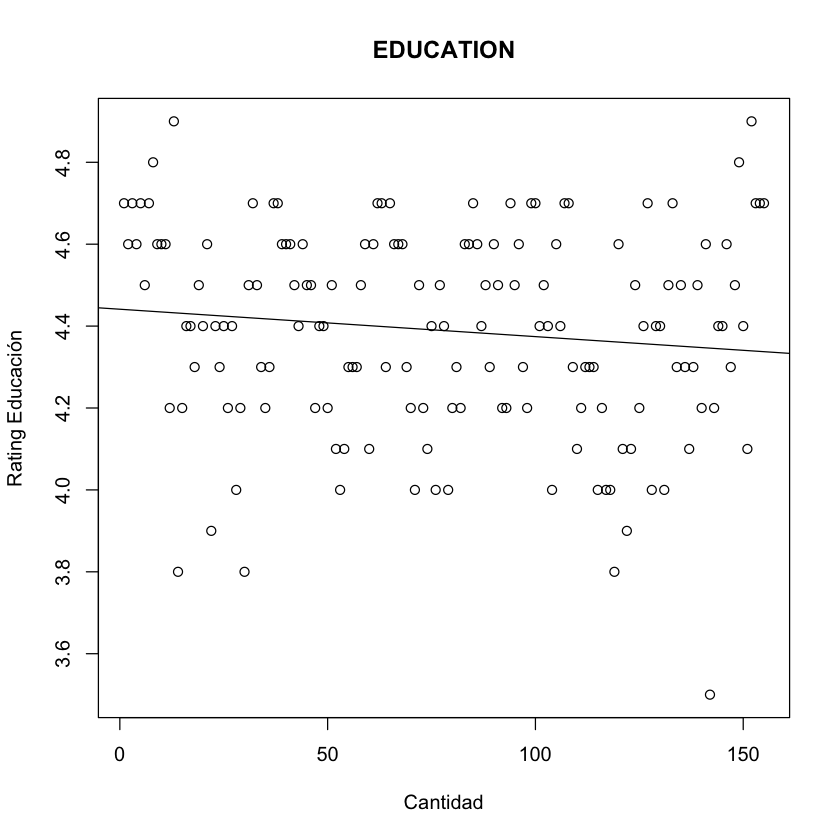

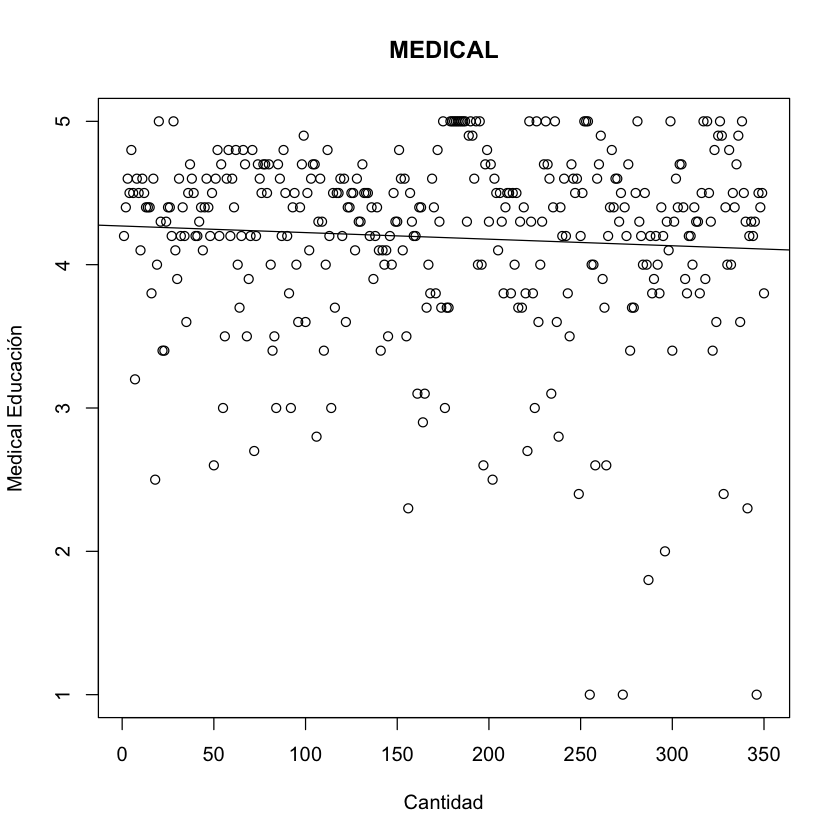

In [311]:
#Dividimos en dos subset 
education= subset(datos, datos$Category== "EDUCATION")
medical= subset(datos, datos$Category== "MEDICAL")

desv_education<- sd(education$Rating)
desv_medical<- sd(medical$Rating)

c(Desviación_education = desv_education, Desviación_medical= desv_medical)

plot(education$Rating,main="EDUCATION", xlab="Cantidad", ylab="Rating Educación" )
abline(lsfit(1:length(education$Rating), education$Rating))
plot(medical$Rating,main="MEDICAL", xlab="Cantidad", ylab="Medical Educación")
abline(lsfit(1:length(medical$Rating), medical$Rating))
#falta colocar una linea de tendencia para evidenciar la dispersión :o


**Respuesta:** El grupo con datos mas dispersos corresponde a *Medical*, esto pues su desviación estanadar tal como se presenta a un comienzo corresponde a un valor de 0,66. Este valor se refleja en el gráfico de dispersión presentado. Dicho grafico evidencia y comprueba como los datos se distribuyen más lejos a la linea de tendencia que en el caso del grupo *Education*. 

>c) Construya un boxplot sobre la cantidad de instalaciones de las aplicaciones cuyo rating sea menor a 4 y otro para las aplicacions cuyo rating sea mayor o igual a 4, compare lo que observa. 

**Hint:** Podría aplicar algún cambio de escala a los valores. ¿Cuál? No log sé. 

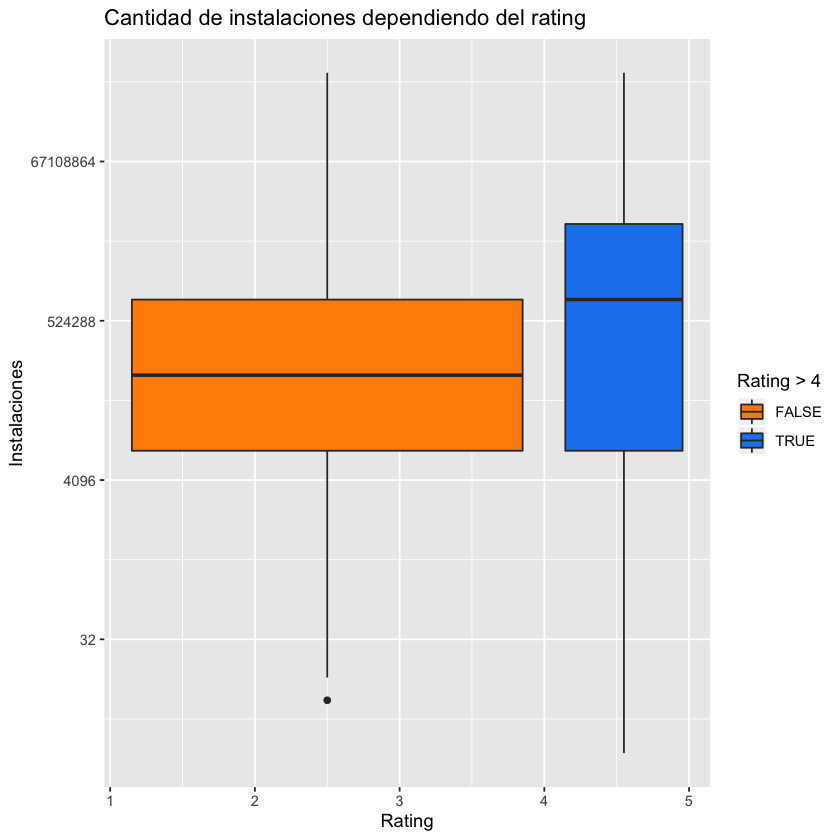

In [337]:
# Instalaciones

#Los valores no concuerdan , no es esta conversión
library(ggplot2)
library(scales)


#boxplot
ggplot(datos, aes(x=Rating, y=install$Installs, fill=Rating>4))+ ggtitle("Cantidad de instalaciones dependiendo del rating") + 
    geom_boxplot() + 
 xlab("Rating") + ylab("Instalaciones") + scale_y_continuous(trans = log2_trans()) + 
    scale_fill_manual(values=c("darkorange","dodgerblue2"))


>d) Para cada categoría obtenga el rango, la deviación estándar, varianza del rating y la cantidad de aplicaciones pertenecientes a dicha categoría y responda:

* De las aplicaciones de mayor rango (fíjelo usted) ¿Cuáles presentan mayor y menor variabilidad?
* ¿Cuál es la principal diferencia entre las aplicaciones cuyo rango es inferior a 2.5 y las cuyo rango es mayor a dicho valor? (Si usted no nota una diferencia significativa es una respuesta válida, siempre y cuando esté fundamentada)
* ¿Es posible concluir que las categorías con una mayor cantidad de aplicaciones presentan una mayor variabilidad de rating que aquellas con menos aplicaciones? 

In [51]:
install.packages("tables", dependencies=TRUE)


The downloaded binary packages are in
	/var/folders/_v/28dk7w3n30s_f4l9svrm736w0000gn/T//RtmpcqJ01o/downloaded_packages


In [313]:
#Funcion para calcular lo solicitado
mistads <- function(x){
                n <- length(x) #largo
                v <- var(x) #varianza
                s <- sd(x) #Desviacion estandar
                cv <- sd(x)/mean(x)
                return(c( desviacion= s , varianza=v,  cantidad_app =n))
}

#Rating a numeros
# distinct(datos, Category) # No aparece category 1.9 :S

datos$Rating <- as.numeric(datos$Rating)
datos<- datos[datos$Category != "1.9", ]
library(tables) 
tt <- tabular( ( Categoria = Category ) ~ 
             ( Rating = Rating ) *
             ( (Media = mean) + 
               (Desviación = sd) + 
               (Mínimo = min) + 
               (Máximo = max) + 
               (Mediana = median) ) +
             ( Cantidad_App = 1 ), 
             data = datos )
tt

Warning message in summary(values[subset]):
“ningún argumento finito para min; retornando Inf”Warning message in summary(values[subset]):
“ningun argumento finito para max; retornando -Inf”

                                                                             
                         Rating                                              
 Categoria               Media  Desviación Mínimo Máximo Mediana Cantidad_App
 1.9                       NaN      NA     Inf    -Inf    NA        0        
 ART\\_AND\\_DESIGN      4.358  0.3583     3.2     5.0   4.4       62        
 AUTO\\_AND\\_VEHICLES   4.190  0.5437     2.1     4.9   4.3       73        
 BEAUTY                  4.279  0.3626     3.1     4.9   4.3       42        
 BOOKS\\_AND\\_REFERENCE 4.346  0.4290     2.7     5.0   4.5      178        
 BUSINESS                4.121  0.6244     1.0     5.0   4.3      303        
 COMICS                  4.155  0.5378     2.8     5.0   4.4       58        
 COMMUNICATION           4.159  0.4262     1.0     5.0   4.3      328        
 DATING                  3.971  0.6305     1.0     5.0   4.1      195        
 EDUCATION               4.389  0.2519     3.5     4.9   4.4    

>e) Responda las siguientes preguntas: 

* Si mi aplicación pesa mucho ¿es probable que sea mal calificada?
* Si mi aplicación tiene una mayor cantidad de instalaciones ¿su rating será más alto?
* Si mi app está enfocada en alguna categoría en especial ¿tendrá una mayor cantidad de instalaciones?
* ¿Existe alguna categoría donde se aprecien más aplicaciones pagas que gratuitas?

Fundamente su respuesta utilizando herramientas visuales o estadísticas. 

**SOLUCIÓN** :  Para la primera pregunta primero debemos establecer que es "pesa mucho" y "mal calificada", por lo que se define lo siguiente:
* Pesa mucho(PM) : Size mayor a la media
* Mal calificada(MC) : Rating menor a la media
* Mayor cantidad de instalaciones (MI) : Installs mayor a la media
* Ranking alto (RA) :Ranking mayor a la media


In [340]:
m_r = mean(datos$Rating)
#datos$Size <- as.numeric(datos$Size)
m_s = mean(tamanios$Size)
m = (tamanios$Size =="<NA>")
m

#datos$Installs <- as.numeric(datos$Installs)
m_i = mean(install$Installs)

#ARREGLAR DATOS PARA TRABAJARLOS 


c(Media_Rating = m_r, Media_Size= m_s, Media_Installs = m_i)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE    NA FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE    NA FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373]    NA FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE    NA FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE    NA FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

Media_Rating     Media_Size Media_Installs 
  4.191757e+00             NA   1.789744e+07

* **P(MC|PM)** = Probabilidad de que la aplicación sea mal calificada cuando pesa mucho

In [ ]:
#Pesa mucho cuando el peso es mayor al promedio

* **P(RA|MI)** = Probabilidad de que la aplicación tenga ranking alto con una mayor cantidad de instalaciones

In [298]:
#Mayor cantidad de instalaciones cuando installs mayor a la media
MI =subset(datos, datos$Installs> m_i)
n_mi = nrow(MI)

#ranking >media
RA= subset(MI,MI$Rating > m_r)
n_ra= nrow(RA)
prob = n_ra/n_mi
prob_porcent= prob*100
c(Probabilidad = prob_porcent)

Probabilidad 
     67.0201

* Probabilidad cantidad de instalaciones (sobre la media) según categoria

In [262]:
t <- tabular( ( Categoria = Category ) ~ 
             ( Instalaciones = Installs ) *
             ( (Media = mean) ),
             data = datos )
t

                                      
                         Instalaciones
 Categoria               Media        
 1.9                          NaN     
 ART\\_AND\\_DESIGN       2003760     
 AUTO\\_AND\\_VEHICLES     727805     
 BEAUTY                    640862     
 BOOKS\\_AND\\_REFERENCE 10793773     
 BUSINESS                 3306165     
 COMICS                    966140     
 COMMUNICATION           99534273     
 DATING                   1355360     
 EDUCATION                5621626     
 ENTERTAINMENT           19256107     
 EVENTS                    354431     
 FAMILY                   5871609     
 FINANCE                  2713970     
 FOOD\\_AND\\_DRINK       2511722     
 GAME                    31983466     
 HEALTH\\_AND\\_FITNESS   5330156     
 HOUSE\\_AND\\_HOME       2218184     
 LIBRARIES\\_AND\\_DEMO    955123     
 LIFESTYLE                1711978     
 MAPS\\_AND\\_NAVIGATION  5840867     
 MEDICAL                   152016     
 NEWS\\_AND\\_MAGAZINES  

In [264]:
library(tables) 
#Tipo pagadas y free
tt <- tabular( ( Categoria = Category ) ~ 
             ( Type = Type ), 
             data = datos )
tt

                                           
                         Type              
 Categoria               0    Free NaN Paid
 1.9                     0       0 0     0 
 ART\\_AND\\_DESIGN      0      59 0     3 
 AUTO\\_AND\\_VEHICLES   0      72 0     1 
 BEAUTY                  0      42 0     0 
 BOOKS\\_AND\\_REFERENCE 0     170 0     8 
 BUSINESS                0     292 0    11 
 COMICS                  0      58 0     0 
 COMMUNICATION           0     306 0    22 
 DATING                  0     191 0     4 
 EDUCATION               0     151 0     4 
 ENTERTAINMENT           0     147 0     2 
 EVENTS                  0      45 0     0 
 FAMILY                  0    1585 0   162 
 FINANCE                 0     310 0    13 
 FOOD\\_AND\\_DRINK      0     107 0     2 
 GAME                    0    1020 0    77 
 HEALTH\\_AND\\_FITNESS  0     285 0    12 
 HOUSE\\_AND\\_HOME      0      76 0     0 
 LIBRARIES\\_AND\\_DEMO  0      65 0     0 
 LIFESTYLE               0     2

>f) Construya un histograma de los tamaños de las aplicaciones ¿Se aprecia algún tipo de sesgo en la distribución?.

In [299]:
hist(datos$Size, main = "Histograma de Tamaños", 
     xlab = "Tamños de la aplicaciones", ylab = "Frecuencia", col = "orange")


ERROR: Error in hist.default(datos$Size, main = "Histograma de Tamaños", xlab = "Tamños de la aplicaciones", : 'x' must be numeric


Con respecto a la gráfica también tenemos los siguientes datos:

In [320]:
datos<- datos[datos$Size != 'NA', ]
media = mean(datos$Size)
mediana = median(datos$Size)
#distinct(datos,Size)
mediana
media

Warning message in mean.default(datos$Size):
“argument is not numeric or logical: returning NA”Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”

[1] NA

[1] NA

>g) Haga un histograma para los ratings de cada categoría. ¿Observa algún patrón respecto al sesgo de los histogramas obtenidos?

In [336]:
distinct(datos, Category)



Category
<fct>
ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION


>h) Construya un heatmap (debe investigarlo por su cuenta) de las aplicaciones pagas donde la dimensión de color sea el rating y los ejes sean el precio y el tamaño de la aplicación. Concluya respecto a lo observado.

In [ ]:
aplicaciones= subset(datos, Type == "Paid")
aplicaciones$Category <- NULL
aplicaciones$Reviews <- NULL
aplicaciones$Installs <- NULL
aplicaciones$Type <- NULL
aplicaciones$Price <- NULL
aplicaciones$Content.Rating <- NULL
aplicaciones$Genres <- NULL
aplicaciones$Last.Updated <- NULL
aplicaciones$Current.Ver <- NULL
aplicaciones$Android.Ver <- NULL

library(ggplot2) 
library(tidyr)
#new <- aplicaciones %>% gather (key=App, value= Rating, "Photo Editor & Candy Camera & Grid & ScrapBook":"iHoroscope - 2018 Daily Horoscope & Astrology")
ggplot(aplicaciones, aes(x=aplicaciones$Size, y=aplicaciones$App, fill=aplicaciones$Rating)) + geom_tile()

#as.matrix(aplicaciones)
#str(aplicaciones)
#heatmap(as.matrix(aplicaciones), scale = "none")

## 3. Aproximando el perímetro de una circunferencia (20p)

De sus cursos de matemática seguro habrá escuchado acerca de las coordenas polares, un cambio de coordenadas donde representamos los puntos en función de un radio y un ángulo. 

$$
x = r\cdot cos(\theta)
$$

$$
y = r\cdot sin(\theta)
$$

Utilizando estas coordenadas, usted posicionará $n$ puntos aleatorios dentro de la circunferencia lo que generará un polígono irregular, para cada $n \in [4,\infty]$ elegido debe simular una cantidad suficiente de polígonos (800-1000) que utilizará para aproximar el perímetro de la circunferencia, luego calculará el perímetro promedio y la desviación estándar para cada $n$ utilizado.


Una vez haya simulado con varios $n$ distintos grafique el perímetro promedio junto a su margen de error $\bar{x} \pm \sigma$ y el perímetro real de la circunferencia. Utilice la cantidad de lados del polígono como el eje X de su gráfico.

> El gráfico involucra 4 lineas: promedio del perímetro, perímetro real, límite superior del error y límite inferior del error.

Recuerde explicar cómo utilizará el método de los polígonos para aproximar el perímetro de la circunferencia y concluya a partir de lo que observa en el gráfico.

Algunos ejemplos de $n = 5$

<table style="width:100%">
  <tr>
    <th align="right"><img src="img/ej1.png" style="float:left;height:120px"></th>
    <th align="center"><img src="img/ej2.png" style="float:left;height:120px"></th> 
    <th align="left"><img src="img/ej3.png" style="float:right;height:120px"></th>
  </tr>
    
Para facilitar la construcción del polígono se sugiere generar los $n$ puntos y luego conectarlos en sentido antihorario/horario.

In [ ]:
# Respuesta programada en R
set.seed(3)
start.time <- Sys.time()

# Función para verificar que no hayan puntos repetidos
tieneDuplicados <- function(puntos) {
  if (anyDuplicated(puntos)) {
      return(1)
  } else {
      return(0)
  }
}

# Función para generar lista con puntos entre 0 y 2pi y que no se repitan
generarPuntos <- function(nPuntos) {
    repeat {
        puntos <- runif(nPuntos, 0, 2*pi)
        if (!tieneDuplicados(puntos)) {
            break
        }
    }
    return(puntos)
}

# Función que calcula el perímetro
distancia <- function(puntos) {
    puntos <- sort(puntos)
    perimetro_total <- 0
    # Calcular distancias entre puntos
    for (i in 1:length(puntos)) {
        if (i == length(puntos)) {
          delta_x <- cos(puntos[i]) - cos(puntos[1])
          delta_y <- sin(puntos[i]) - sin(puntos[1])
        } else {
          delta_x <- cos(puntos[i]) - cos(puntos[i+1])
          delta_y <- sin(puntos[i]) - sin(puntos[i+1])
        }
        perimetro_total <- perimetro_total + sqrt(delta_x ** 2 + delta_y ** 2)
    }
    return(perimetro_total)
}

# Condiciones iniciales con vectores para guardar resultados
cantidadPuntos <- vector(mode = 'numeric', length = 250)
perimetros_prom <- vector(mode = 'numeric', length = 250)
perimetros_sd <- vector(mode = 'numeric', length = 250)
i <- 1
# Iterar sobre la cantidad de puntos a generar entre [4, 1000]
for (nPuntos in seq(4, 1000, by = 4)) {
    perimetros <- vector(mode = 'numeric', length = 800)
    # Iterar sobre la cantidad de circunferencias a generar para cada cantidad de puntos
    for (nCircunferencia in 1:800) {
        puntos <- generarPuntos(nPuntos)
        perimetros[nCircunferencia] <- distancia(puntos)
    }
    # Guardar resultados
    cantidadPuntos[i] <- nPuntos
    perimetros_prom[i] <- mean(perimetros)
    perimetros_sd[i] <- sd(perimetros)
    i <- i+1
}

# Cálculo de tiempo
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

datos <- data.frame(nPuntos = cantidadPuntos, perimetros_promedio = perimetros_prom, sd_perimetros = perimetros_sd)
#head(datos)

# Generación de gráfico
ggplot(data=datos, aes(x=nPuntos, y=perimetros_promedio)) +
ggtitle("Simulación de perímetro de circunferencias") +
xlab("Cantidad de puntos generados") +
ylab("Perímetro") +
geom_smooth(method = "loess", aes(color="Perímetro promedio"), se = FALSE) +
geom_hline(aes(yintercept = 2*pi, color = "Perímetro real")) +
scale_x_continuous(trans='log2') +
labs(color='Datos') +
geom_smooth(method = "loess", aes(x=nPuntos, y=(perimetros_promedio+sd_perimetros), color="Límite superior error"), se = FALSE) +
geom_smooth(method = "loess", aes(x=nPuntos, y=(perimetros_promedio-sd_perimetros), color="Límite inferior error"), se = FALSE)

### Explicación resultados
El ejercicio se realizó simulando las circunferencias generando puntos al azar y calculando el perímetro del polígono generado, utilizando desde 4 a 1000 puntos y, a su vez, para cada cantidad de puntos, se hicieron 800 simulaciones, obteniendo así el perímetro promedio de cada polígono generado. También se trabajó con la restricción de que los puntos generados al azar no se pudieran repetir.

Como se puede ver en el gráfico, al principio los perímetros obtenidos se alejaban bastante del perímetro real, iniciando con un error porcentual aproximado de un 28.4% y con un alto nivel de variación en cada simulación, lo que se refleja en el amplio rango de los errores (límite superior e inferior). Luego, al aumentar el número de puntos, las simulaciones se normalizan rápidamente, acercándose antes de los 100 puntos al perímetro real al prácticamente interceptar las cuatro líneas, lo que implica que el margen de error prácticamente se elimina. La simulación termina con un error aproximado de un 0.0%, lo que demuestra la validez de la metodología para estimar el perímetro de la circunferencia y que ello depende directamente de la cantidad de puntos utilizados en la simulación.

## 4. Bingo Ball (30p)

A usted se le ha presentado la oportunidad de ganar un increíble premio que cuesta 10 veces el valor de 1 intento en el juego de de "Bingo Ball", el juego consiste en lo siguiente (instrucciones abajo del diagrama)nPuntos

<img src="img/game.png">

En el diagrama, los círculos representan "etapas" por las que la bolita puede pasar. El funcionamiento del juego es el siguiente:

* Usted lanzará 7 bolitas secuencialmente.
* Cada bolita llega inicialmente a A, B, C o D (no entre medio o a algún otro lugar). Esto se asume equiprobable a menos que se diga lo contrario.
* En cada etapa la bolita tiene la posibilidad de caer hacia la izquierda o a la derecha. Ciertas etapas (relleno amarillo) hacen que la bolita caiga en una única dirección ya que la bolita caería del tablero si no fuera así.
* La bolita si o sí pasará por una y solo una etapa de cada fila $F_{i}\;\; i \in [1,4]$ (linea punteada en el diagrama)
* Usted ganará el juego si cada zona final (1,2,3,4) es alcanzada al menos 1 vez por cada bolita.

>En palabras simples, la bolita va bajando mientras cambia (o no) de dirección al chocar con los puntos negros.


A continuación, se presenta un ejemplo del recorrido de una bola:

<img src="img/game2.png">

Como puede ver, la bola inicialmente llegó a "A", luego su recorrido fue: izquierda, derecha (no hay otra opción), derecha, derecha y finalmente llegó a la zona 2.

El tablero que se presenta en ambos diagramas es el mismo tablero que deberá simular (es fijo). 
Considere que $P(irse\;a\;la\;izquierda) = 0.5$ a menos que se indique lo contrario.

En base a esto responda:

>a) ¿La cantidad de bolitas suministradas es suficiente para poder obtener el premio a un precio menor que el original?


In [ ]:
# Función de probabilidad siguiendo distribución geométrica
fdp <- function(probabilidad, intentos) {
    return((1-probabilidad)**(intentos-1)*probabilidad)
}

# Calculo de probabilidad, considerando combinaciones de éxitos y fallos para cada lanzamiento
probabilidad_total <- function(nLanzamientos, zonas_exitosas = 4, zonas_totales = 4, calculo_prob = 1) {
    # Caso base, no quedan más zonas para ganar
    if (zonas_exitosas == 0) {
        return(calculo_prob)
    }
    # Las zonas que faltan para ganar
    otras_zonas <- zonas_exitosas - 1
    # Intentos restantes
    nIntentos <- nLanzamientos - otras_zonas
    suma_probabilidades <- 0
    # Asumiendo éxito en i intentos
    for (i in seq(1:nIntentos)) {
        # Cálculo robabilidad éxito
        p <- zonas_exitosas/zonas_totales
        fdp <- fdp(p, i)
        # Calcular probabilidad zonas siguientes, en profundidad
        prob_actual <- probabilidad_total(nLanzamientos-i, zonas_exitosas-1, calculo_prob = calculo_prob * fdp)
        # Suma eventos independientes
        suma_probabilidades <- suma_probabilidades + prob_actual
    }
    return(suma_probabilidades)
}

probabilidad_final <- probabilidad_total(7)
cat("Probabilidad de ganar con 7 lanzamientos:", probabilidad_final, "\n")

ganancia_esperada <- probabilidad_final * (10 - 1) + (1 - probabilidad_final) * (-1)
cat("Ganancia esperada:", ganancia_esperada, "\n")

### Respuesta
#### 1. Probabilidad zonas finales
Siguiendo los caminos posibles, se puede ver que luego de caer en las zonas (A, B, C, D) la probabilidad de ir en cada dirección se divide en dos, siendo cada camino de 12,5%. Luego, para los puntos de la orilla queda simplemente 12,5%, pero a los puntos centrales se puede llegar a cada uno por dos caminos de 12,5%, por lo que para los puntos centrales hay una probabilidad de un 25% de llegar a cada uno. Luego, como de las orillas sólo se puede volver y de los puntos centrales, nuevamente se divide en dos, para la siguiente fase hay una probabilidad de 12,5% + 12,5% = 25% para cada punto central, repitiéndose la situación inicial y completándose así un ciclo. Para obtener la probabilidad final de cada zona A, B, C, D; se puede continuar calculando los caminos posibles o bien se puede considerar que se completan dos ciclos, resultando en que para cada zona final hay un 25% de probabilidad de llegar.

#### 2. Probabilidad éxito

Inicialmente lo que se quiere es buscar la probabilidad, para ello modelamos el problema de la siguiente forma:

La probabilidad va variando según las posibles zonas favorables, en un principio cualquier zona (1, 2, 3, 4) es favorable, por lo que el éxito se produce siempre. Luego, dicha probabilidad es de 3/4; 2/4; 1/4; dependiendo de cuántas zonas falten para ganar. Llamaremos a estos casos como etapas 1, 2, 3, 4; dependiendo de a cuántas zonas se ha acertado en total.

Es importante contabilizar adecuadamente la cantidad de lanzamientos necesarios para el éxito en cada etapa, considerando que para los lanzamientos restantes, también se debe considerar que es necesario guardar lanzamientos para tener posibilidad de conseguir las zonas restantes.

Es por esto que cada etapa se modela con una distribución geométrica `Geo(p)` siendo `p la probabilidad de obtener la siguiente zona exitosa` (4/4, 3/4, 2/4, 1/4) y nuestra variable aleatoria `X, el número de repeticiones (lanzamientos) hasta acertar a alguna zona exitosa (éxito)`. Así, se tiene su función de probabilidad:

P(X = x) = p(1-p)<sup>x-1</sup>

Entonces, para calcular la probabilidad se deben obtener todas las combinaciones de lanzamientos, para cada etapa, es decir, si lo vemos como un árbol de posibilidades:

1. En la etapa 1 hay sólo una rama, ya que hay 100% probabilidad de éxito, restando 6 lanzamientos
2. En la etapa 2 salen cuatro subramas, dependiendo de si se usaron 1, 2, 3 ó 4 lanzamientos, considerando que hay que dejar 2 lanzamientos para poder tener éxito en las etapas restantes.
3. En la etapa 3, el árbol se sudivide según el número de lanzamientos usados en la etapa 2.
4. En la etapa 4, se utilizan las combinaciones posibles con los lanzamientos restantes.

Por ejemplo, si hay un éxito en la etapa 1, 2 y 3, quedan 4 lanzamientos, por lo que para dicha etapa salen 4 ramas.

Así, la probabilidad en cada combinación corresponde a la multiplicación de la probabilidad en cada etapa:

p<sub>camino</sub> = p<sub>1</sub> ⋅ p<sub>2</sub> ⋅ p<sub>3</sub> ⋅ p<sub>4</sub>; siendo cada p<sub>i</sub> calculado siguiendo Geo(p<sub>i</sub>).

Luego, la probabilidad total, se suman todas las probabilidades independientes para cada camino con todas las combinaciones de caminos posibles según los lanzamientos usados en cada etapa.

#### 3. Conclusión
Para terminar, se calcula la ganancia esperada con la probabilidad de ganar el juego. Si asignamos `x = costo de 1 juego`, entonces la ganancia se calcula:
E[g(x)] = p<sub>ganar</sub> ⋅ (10x - x) + p<sub>perder</sub> ⋅ (-x)

Así, se obtiene una ganancia esperada por juego de 4,126953x. Es por ello que se recomienda jugar y las bolitas suministradas sí son suficientes para obtener un premio gastando menos de lo obtenido.

> b) Para $4 \leq n \leq 100$ calcule la probabilidad de ganar el juego al menos 1 vez en función de $n$ bolas. Presente el resultado en un gráfico de Probabilidad v/s $n$.

No basta 1 simulación para cada $n$

In [ ]:
set.seed(38)

# Función para simular un lanzamiento según nivel de profundidad en el juego
lanzar <- function(pos = 0, depth = 0) {
    # Final juego
    if (depth == 4) {
        return(ceiling(pos/2))
    }
    # Elegir dirección izquierda o derecha
    lado <- floor(runif(1,1,3))
    if (depth == 0) {
        # Posiciones predefinidas entre (0,1,2,3,4,5,6,7,8) para los puntos de izquierda
        # a derecha, en niveles con 4 puntos (1,3,5,7), en niveles con 5 puntos (0,2,4,6,8)
        pos <- floor(runif(1,1,5))*2-1
    }
    # Lado de más a la izquierda, solo una opción
    if (pos == 0) {
        pos <- pos+1
    # Lado de más a la derecha, solo una opción
    } else if (pos == 8) {
        pos <- pos-1
    # Ir izquierda
    } else if (lado == 1) {
        pos <- pos-1
    # Ir derecha
    } else {
        pos <- pos+1
    }
    return(lanzar(pos, depth+1))
}

# Función para verificar victoria
isVictoria <- function(resultados) {
    # Lista con flags de si se alcanzó cada zona[i]
    objetivo = c(0, 0, 0, 0)
    # Viendo en los resultados obtenidos hasta ahora
    for (i in 1:length(resultados)) {
        actual <- resultados[i]
        # Marcar zona si no estaba marcada
        if (!objetivo[actual]) {
            objetivo[actual] <- 1
            # Si ya están todas las zonas
            if (sum(objetivo) == 4) {
            return(1)
            }
        }
    }
    # No se encontró victoria
    return(0)
}

cantidadBolas <- vector(mode = 'numeric', length = 97)
prob_nBolas <- vector(mode = 'numeric', length = 97)
for (nBolas in 4:100) {
    nVictorias <- 0
    for (nSimulacion in 1:1000) {
        resultados <- c()
        # Lanzamientos por intento
        for (lanzamiento in 1:nBolas) {
            # Guardar resultados en simulación
            resultados <- c(resultados, lanzar())
            # Verificar victoria
            if (lanzamiento >= 4) {
                win <- isVictoria(resultados)
                if (win) {
                    nVictorias <- nVictorias+1
                    break
                }
            }
        }
    }
    cantidadBolas[nBolas-3] <- nBolas
    prob_nBolas[nBolas-3] <- nVictorias/1000
}

simulacion <- data.frame(nBolas = cantidadBolas, probabilidad = prob_nBolas)
head(simulacion)

# Generación de gráfico
ggplot(data=simulacion, aes(x=nBolas, y=prob_nBolas)) +
ggtitle("Simulación de Bingo Ball") +
scale_x_continuous(trans='log2') +
xlab("Cantidad de bolas utilizadas") +
ylab("Probabilidad de ganar") +
geom_smooth(method = "loess", se = FALSE)

### Explicación resultados
Los cálculos de probabilidad se realizaron simulando 1000 intentos para cada cantidad n de bolas entre 4 y 100 y calculando las victorias obtenidas entre los intentos.
Como se puede ver la probabilidad para 7 lanzamientos tiene un error porcentual aproximado de 1,4% al calculado en la parte a), se puede alcanzar una mayor certeza aumentando el número de simulaciones. La probabilidad incrementa rápidamente según el número de bolas utilizadas llegando a aproximadamente un 100% de probabilidad de ganar con 30 bolas y luego se mantiene constante, como se espera al aumentar los lanzamientos y siendo que no hay más del 100% de probabilidad de ganar.

>c) Si a usted le queda 1 bola restante y solamente le falta cubrir la zona 3 determine la zona inicial a la que deberá apuntar el tiro para maximizar la probabilidad de ganar. 

Para ello vemos las probabilidad de llegar a la zona 3, partiendo en cada zona inicial distinta. Vemos que en cada piso se agrega la probabilidad de irse a la izquierda o a la derecha (ambas son 0,5), entonces cada camino distinto equivale a:

p<sub>camino</sub> = (1/2)<sup>4</sup>

Entonces, la probabilidad de llegar a la zona X corresponde a la suma de la cantidad n de caminos:

p(X) = n ⋅ (1/2)<sup>4</sup>

* Partiendo en A: hay solo un camino (derecha, derecha, derecha, derecha), entonces p<sub>A</sub>(3) = 0,0625
* Partiendo en B: hay cuatro caminos, entonces p<sub>B</sub>(3) = 0.25
* Partiendo en C: hay seis caminos, luego p<sub>C</sub>(3) = 0.375
* Partiendo en D: hay cuatro camino, entonces p<sub>D</sub>(3) = 0.25

Así para ganar y si le falta cubrir la zona 3




In [ ]:
a <- 6*(1/2)**4
a

b <- 0.0625+0.25+0.25+0.375
b

In [ ]:
asd <- (1/2)*(2*((1/2)**3+(1/2)*2*(1/2)**2))
asd

>d) Determine la probabilidad de alcanzar cada zona final si la bola llega inicialmente a "A". Repita el procedimiento pero esta vez utilizando "C" como punto de partida.

>e) Si ahora la bola tiene un 70% de probabilidad de mantener la dirección actual y un 30% de cambiar de dirección ¿Mantiene la respuesta dada en a)?

En la zona inicial (A,B,C,D) tiene la misma probabilidad de irse tanto a la izquierda como a la derecha, pero en las siguientes zonas si la bolita fue a la izquierda tiene un 70% de irse a la izquierda y un 30% de irse a la derecha, si después se va a la derecha tiene un 70% de probabilidad de irse a la derecha y así sucesivamente.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)